# Hierarcical Clustering (HC)
-> Bir grafik düşün bu grafikte 5 tane nokta olsun bunlara point diyoruz,sonraki adımda en yakın 2 pointi birleştirip cluster oluşturuyoruz. daha sonra bu clusterleri birleştirip devame diyoruz. özelden genele doğru 
* 1) Her bir data point bir cluster olacak 
* 2)En yakın 2 data pointi alıp bir cluster yap
* 3)en yakın 2 clusteri al bunları tek bir cluster yap
* 4)repeat 3.
### Distance (mesafe):
 #### Euclidean distance : iki nokta arası mesafe:
 * En yakın iki noktaya göre 
 * En uzak iki noktaya göre 
 * meane göre
 * centroidine göre

## Dendogram
* Normal scatter plottan farklı olarak scatter plottaki pointlerin mesafesine göre bir grafik oluşturur. Buradan thresshold ve kaç tane cluster olduğunu buluruz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


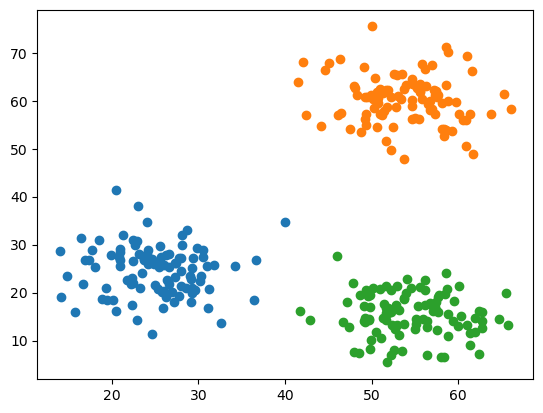

In [3]:
#create dataset
x1=np.random.normal(25,5,100)#kmeans de farklı means de 1000 sample kullanılırken bunda 100 sample kullanıyoruz
y1=np.random.normal(25,5,100)

x2=np.random.normal(55,5,100)
y2=np.random.normal(60,5,100)

x3=np.random.normal(55,5,100)
y3=np.random.normal(15,5,100)

x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)


dictionary={"x":x,"y":y}
data=pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

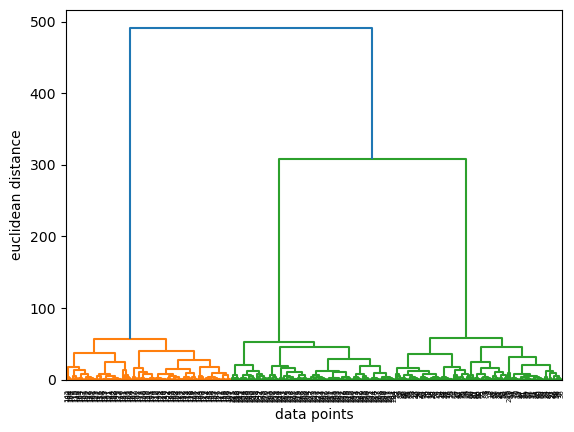

In [5]:
# Dendogram
from scipy.cluster.hierarchy import linkage,dendrogram #(linkage ->Bu bizim çizeceğimiz dendogram için hierarchy demek aslında)
merg=linkage(data,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [8]:
# HC
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")#linkage="ward"->cluster içindeki varyasnı yani yayılımı en az seviyeye indirmek için kullanılır
cluster=hiyerartical_cluster.fit_predict(data)# grafiği oluştur bunları fit et ve predict yap dataalra göre sonra bunu clustere ata


In [9]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [10]:
data["label"]=cluster#data cluster edildi ve dataya label olarka atandı

In [11]:
data

,x,y,label
0,27.445793,26.138728,0
1,27.962078,24.398994,0
2,24.689733,11.400248,0
3,25.293285,20.774793,0
4,14.110104,19.000847,0
...,...,...,...
295,51.706887,14.279596,2
296,50.111078,20.886412,2
297,52.965932,21.292562,2
298,65.507692,19.900388,2


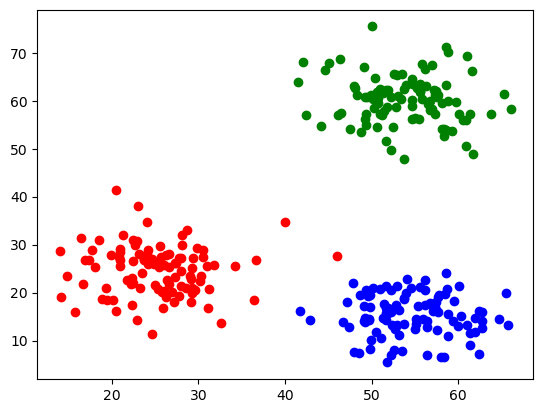

In [15]:
plt.scatter(data.x[data.label==0],data.y[data.label==0],color="red")
plt.scatter(data.x[data.label==1],data.y[data.label==1],color="green")
plt.scatter(data.x[data.label==2],data.y[data.label==2],color="blue")
plt.show()